In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/dataset_1.csv')

# Display the first few rows to ensure it loaded correctly
print(data.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    1.0  05-02-2010    1643690.90           0.0        42.31       2.572   
1    1.0  12-02-2010    1641957.44           1.0        38.51       2.548   
2    1.0  19-02-2010    1611968.17           0.0        39.93       2.514   
3    1.0  26-02-2010    1409727.59           0.0        46.63       2.561   
4    1.0  05-03-2010    1554806.68           0.0        46.50       2.625   

          CPI  Unemployment  product_id  \
0  211.096358         8.106  B07JW9H4J1   
1  211.242170         8.106  B098NS6PVG   
2  211.289143         8.106  B096MSW6CT   
3  211.319643         8.106  B08HDJ86NZ   
4  211.350143         8.106  B08CF3B7N1   

                                        product_name  ...  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...  ...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...  ...   
2  Sounce Fast Phone Charging Cable & Data Sync U...  ...   
3  boAt Deuce USB 300 2 in 1 Type-

# New Section

In [6]:
# Check the shape of the dataset
print(data.shape)





(1466, 26)


In [7]:
# Get basic statistics
print(data.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  1465.000000  1.465000e+03   1465.000000  1465.000000  1465.000000   
mean      5.631399  1.181976e+06      0.069625    65.367672     3.243228   
std       2.960458  6.791233e+05      0.254600    17.394540     0.444325   
min       1.000000  2.606367e+05      0.000000    -2.060000     2.514000   
25%       3.000000  5.107476e+05      0.000000    53.040000     2.771000   
50%       6.000000  1.303914e+06      0.000000    67.760000     3.297000   
75%       8.000000  1.781767e+06      0.000000    80.420000     3.620000   
max      11.000000  3.749058e+06      1.000000    95.360000     4.468000   

               CPI  Unemployment  Facebook_Impressions  Google_Clicks  
count  1465.000000   1465.000000           1466.000000    1466.000000  
mean    197.929120      7.049376           5504.560027     275.302183  
std      35.073913      1.123255           2579.984680     130.458820  
min     126.064000      3.8

In [8]:
# Check for missing values
print(data.isnull().sum())

Store                   1
Date                    1
Weekly_Sales            1
Holiday_Flag            1
Temperature             1
Fuel_Price              1
CPI                     1
Unemployment            1
product_id              1
product_name            1
category                1
discounted_price        1
actual_price            1
discount_percentage     1
rating                  1
rating_count            3
about_product           1
user_id                 1
user_name               1
review_id               1
review_title            1
review_content          1
img_link                1
product_link            1
Facebook_Impressions    0
Google_Clicks           0
dtype: int64


In [9]:
print(data.dtypes)

Store                   float64
Date                     object
Weekly_Sales            float64
Holiday_Flag            float64
Temperature             float64
Fuel_Price              float64
CPI                     float64
Unemployment            float64
product_id               object
product_name             object
category                 object
discounted_price         object
actual_price             object
discount_percentage      object
rating                   object
rating_count             object
about_product            object
user_id                  object
user_name                object
review_id                object
review_title             object
review_content           object
img_link                 object
product_link             object
Facebook_Impressions      int64
Google_Clicks             int64
dtype: object


In [10]:
categorical_columns = [
    'Date', 'product_id', 'product_name', 'category',
    'discounted_price', 'actual_price', 'discount_percentage',
    'rating', 'rating_count', 'about_product',
    'user_id', 'user_name', 'review_id',
    'review_title', 'review_content', 'img_link', 'product_link'
]

In [11]:
for column in categorical_columns:
    data[column] = data[column].fillna('Unknown')

In [12]:
numerical_columns = [
    'Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
    'Fuel_Price', 'CPI', 'Unemployment',
    'Facebook_Impressions', 'Google_Clicks'
]

In [13]:

for column in numerical_columns:
    # Convert to numeric if they are in object format (e.g., 'actual_price')
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column] = data[column].fillna(data[column].median())

In [14]:

print(data.isnull().sum())

Store                   0
Date                    0
Weekly_Sales            0
Holiday_Flag            0
Temperature             0
Fuel_Price              0
CPI                     0
Unemployment            0
product_id              0
product_name            0
category                0
discounted_price        0
actual_price            0
discount_percentage     0
rating                  0
rating_count            0
about_product           0
user_id                 0
user_name               0
review_id               0
review_title            0
review_content          0
img_link                0
product_link            0
Facebook_Impressions    0
Google_Clicks           0
dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


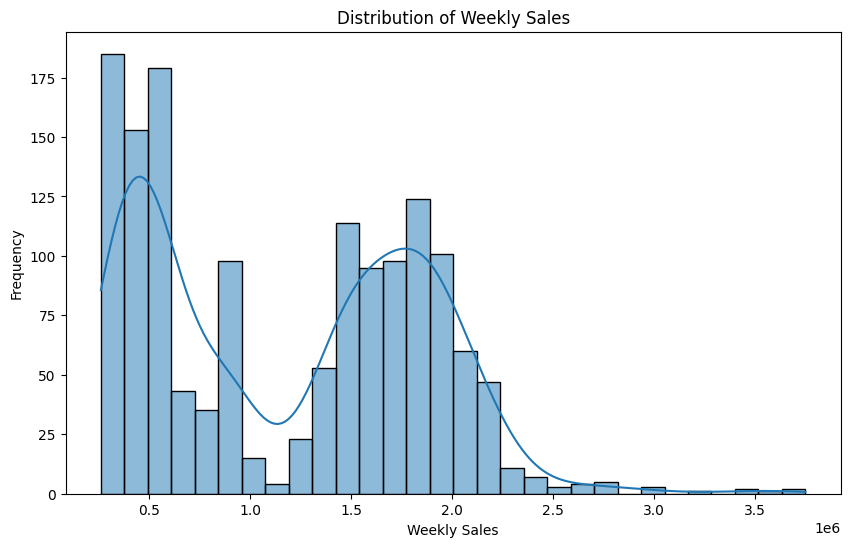

In [16]:
# Visualize the distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [18]:
# Check the correlation matrix
correlation_matrix = numeric_data.corr()


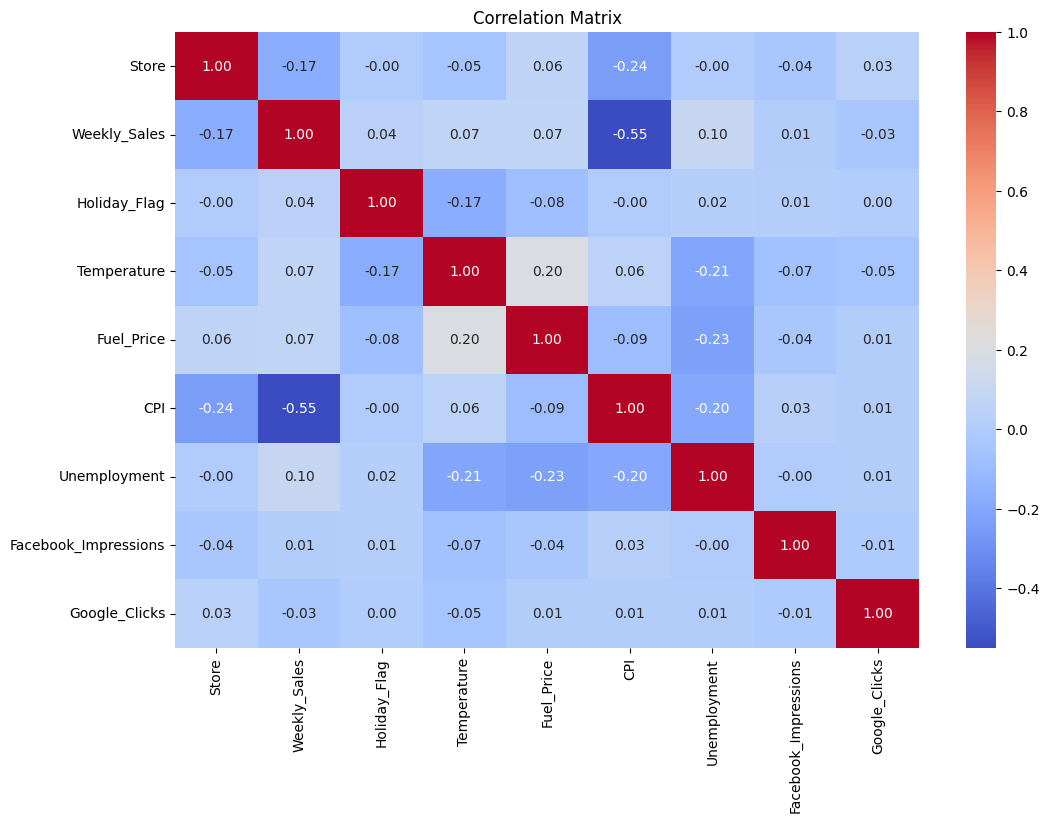

In [19]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [20]:
# Set a threshold for high correlation
threshold = 0.5

# Find features with correlation higher than the threshold
high_corr_features = correlation_matrix['Weekly_Sales'].abs().sort_values(ascending=False)

# Filter out features that have a correlation below the threshold
relevant_features = high_corr_features[high_corr_features > threshold]

print(relevant_features)


Weekly_Sales    1.000000
CPI             0.550427
Name: Weekly_Sales, dtype: float64


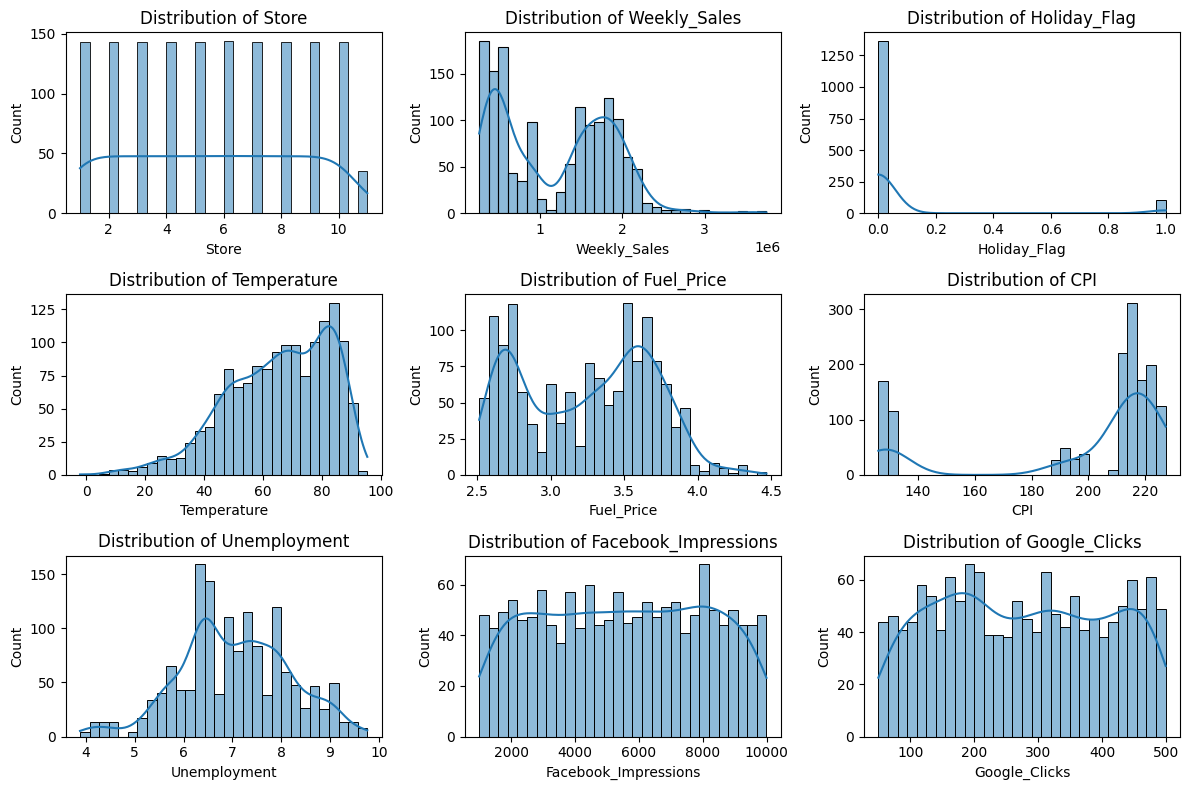

In [21]:
# Plot the distribution of all numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_data.columns, 1):
    plt.subplot(3, 3, i)  # Adjust rows and columns depending on how many features you have
    sns.histplot(numeric_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


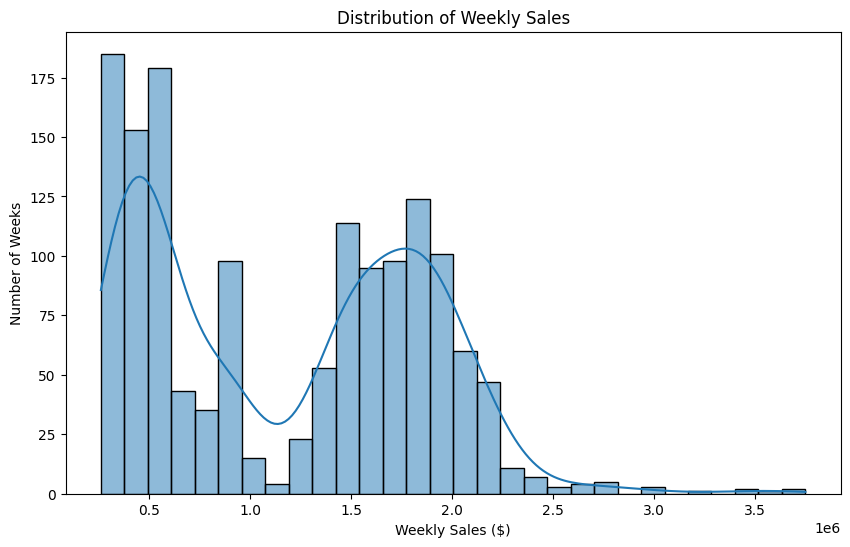

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Number of Weeks')
plt.show()


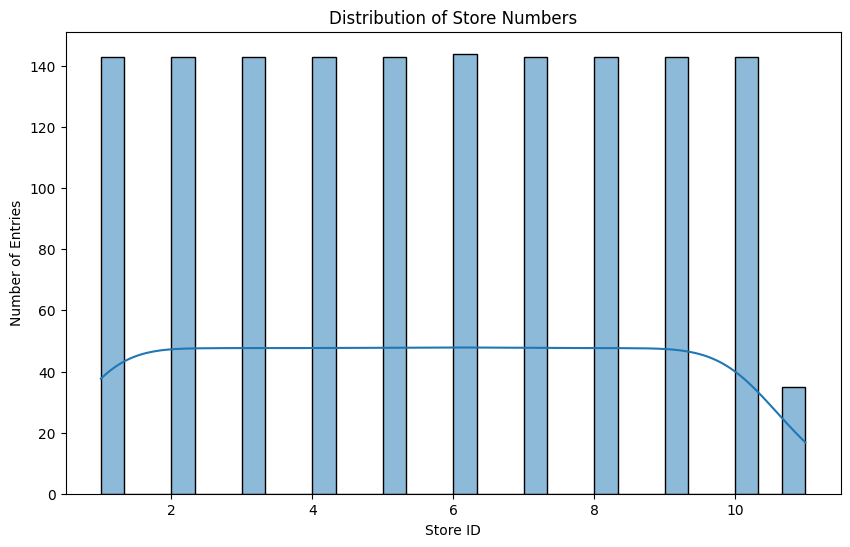

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Store'], bins=30, kde=True)
plt.title('Distribution of Store Numbers')
plt.xlabel('Store ID')
plt.ylabel('Number of Entries')
plt.show()


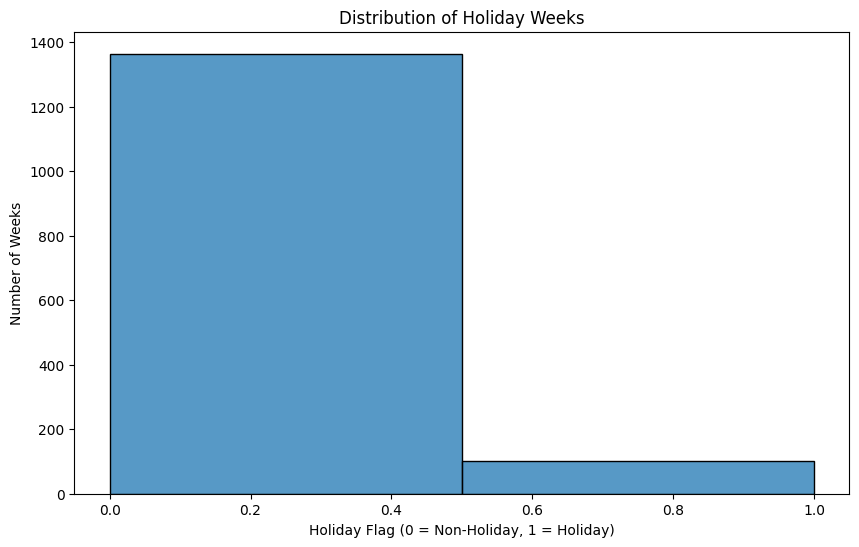

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Holiday_Flag'], bins=2, kde=False)
plt.title('Distribution of Holiday Weeks')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Number of Weeks')
plt.show()


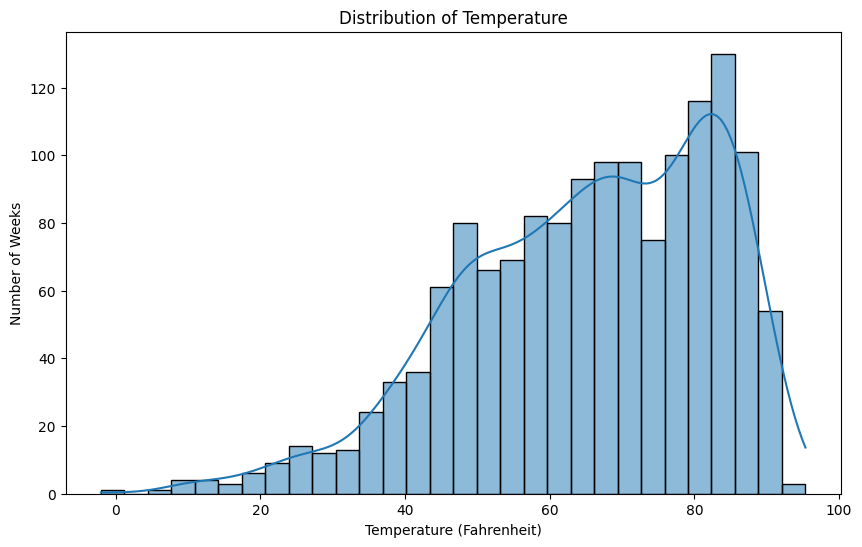

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Number of Weeks')
plt.show()


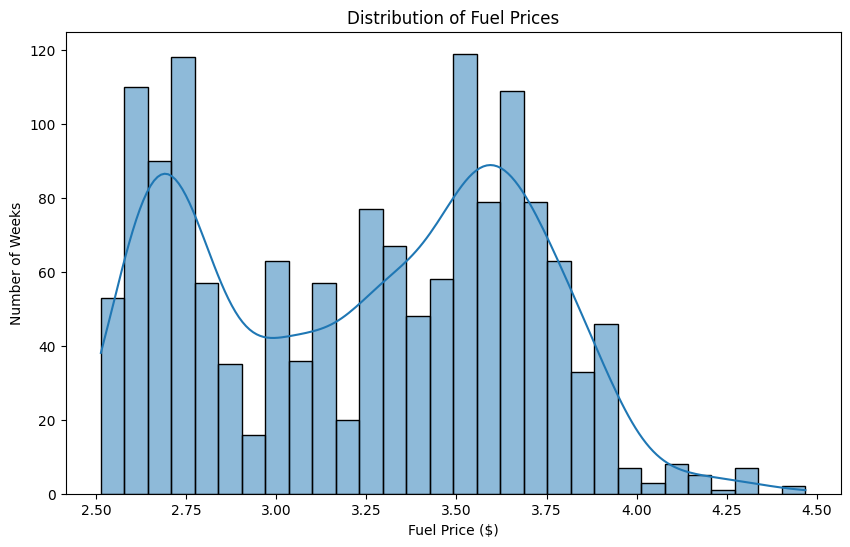

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Fuel_Price'], bins=30, kde=True)
plt.title('Distribution of Fuel Prices')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Number of Weeks')
plt.show()


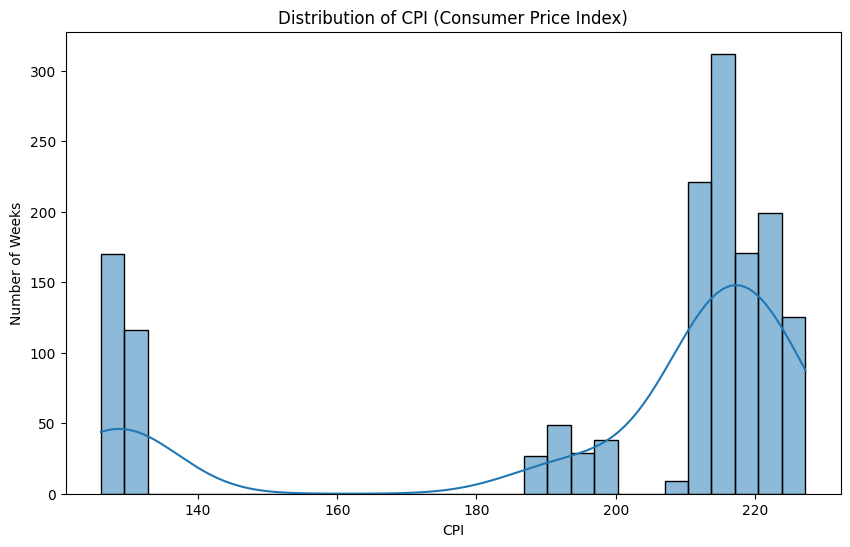

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CPI'], bins=30, kde=True)
plt.title('Distribution of CPI (Consumer Price Index)')
plt.xlabel('CPI')
plt.ylabel('Number of Weeks')
plt.show()


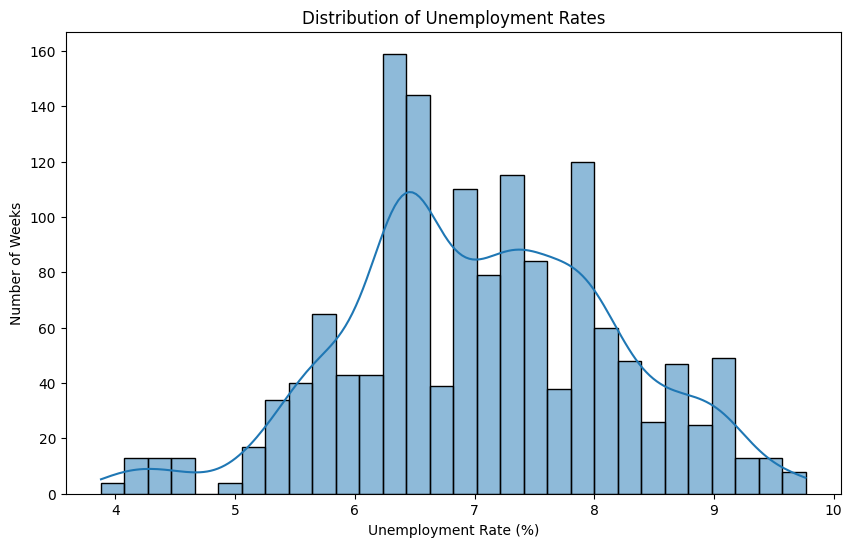

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Unemployment'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Number of Weeks')
plt.show()


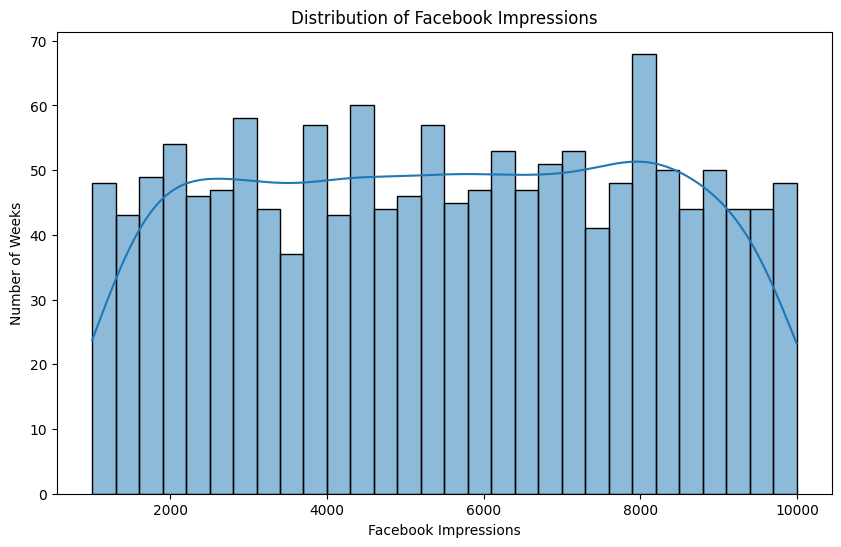

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Facebook_Impressions'], bins=30, kde=True)
plt.title('Distribution of Facebook Impressions')
plt.xlabel('Facebook Impressions')
plt.ylabel('Number of Weeks')
plt.show()


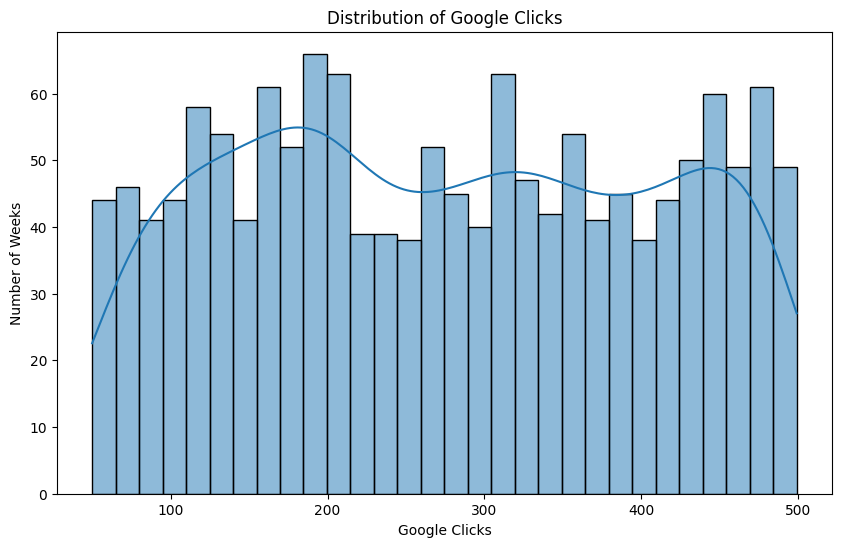

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Google_Clicks'], bins=30, kde=True)
plt.title('Distribution of Google Clicks')
plt.xlabel('Google Clicks')
plt.ylabel('Number of Weeks')
plt.show()


In [31]:
# List of columns to keep
columns_to_keep = [
    'Date', 'product_id', 'product_name', 'Weekly_Sales', 'category',
    'discounted_price', 'actual_price', 'discount_percentage',
    'rating', 'rating_count', 'Holiday_Flag', 'Temperature',
    'Fuel_Price', 'CPI', 'Unemployment'
]

# Select only these columns from the dataset
data = data[columns_to_keep]


<ipython-input-32-bb54897c3d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')


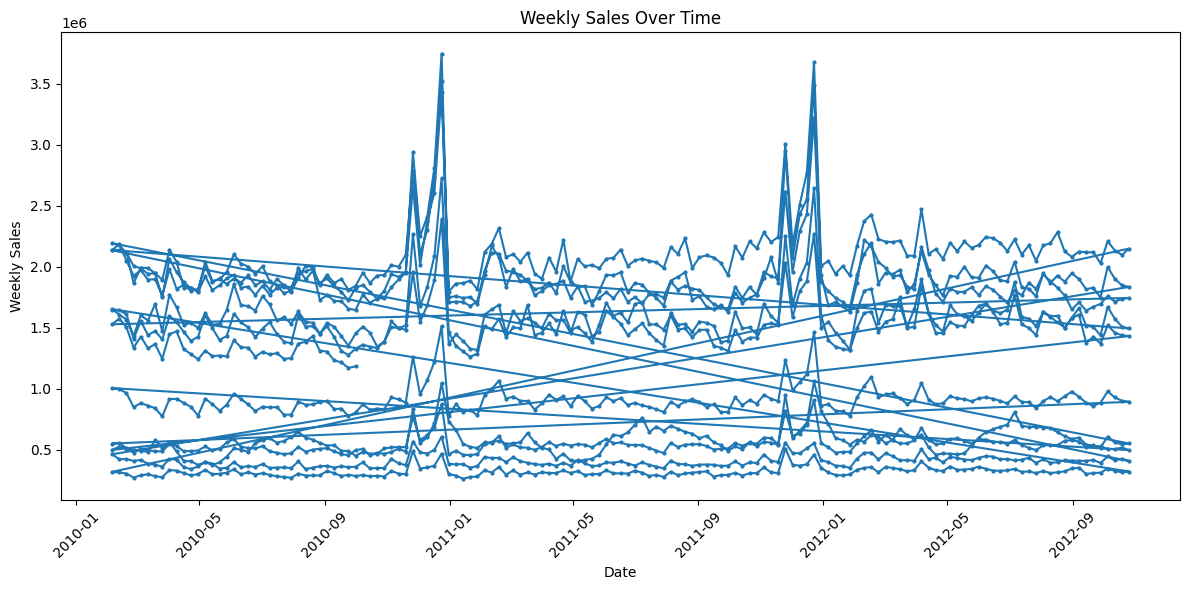

In [32]:
# Convert the 'Date' column to datetime format with day-first format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Weekly_Sales'], marker='o', linestyle='-', markersize=2)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
# Group by week and sum the Weekly Sales
weekly_sales = data.resample('W-Mon', on='Date')['Weekly_Sales'].sum()

# Display the first few rows of the weekly sales data
print(weekly_sales.head())


Date
2010-02-08    14118680.12
2010-02-15    14129209.25
2010-02-22    13677287.89
2010-03-01    12471621.63
2010-03-08    13116217.94
Name: Weekly_Sales, dtype: float64


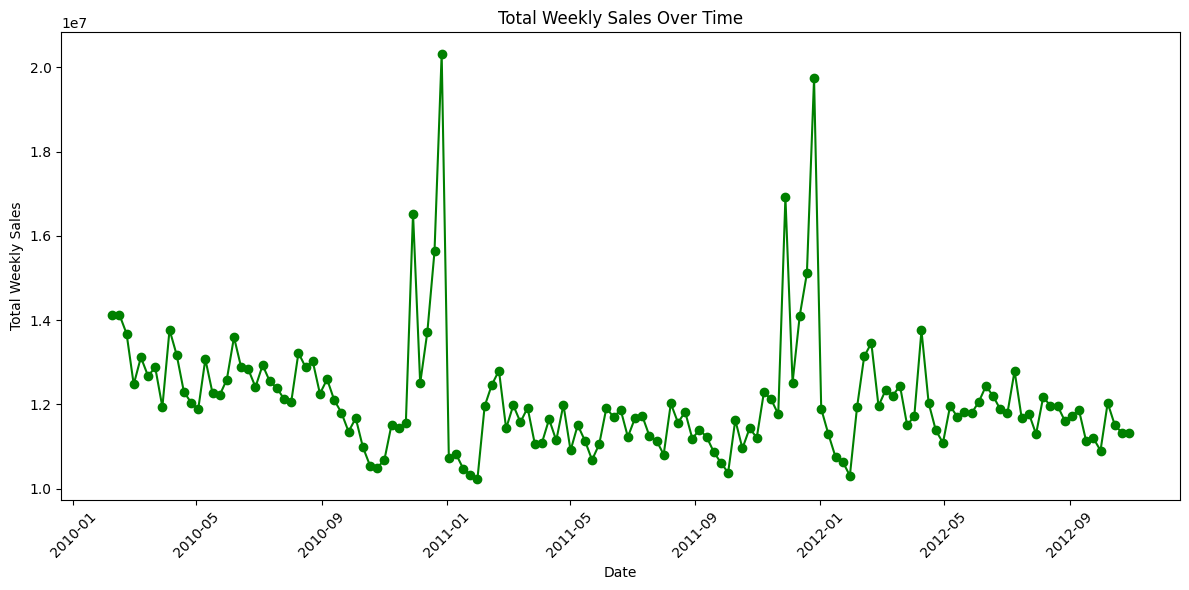

In [34]:

# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', color='green')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


<Figure size 1200x1000 with 0 Axes>

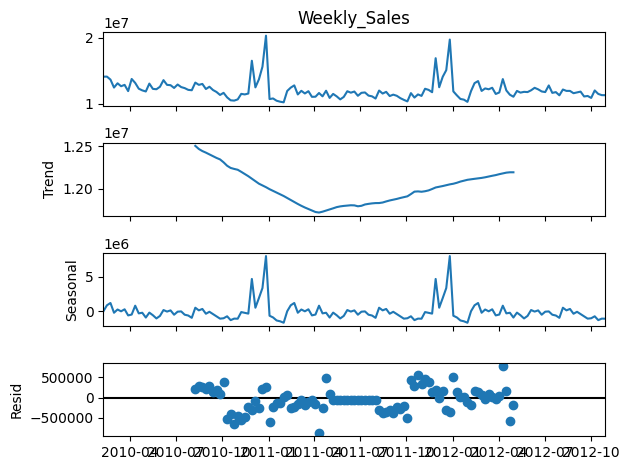

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the weekly sales data
decomposed = seasonal_decompose(weekly_sales, model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 10))
decomposed.plot()
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

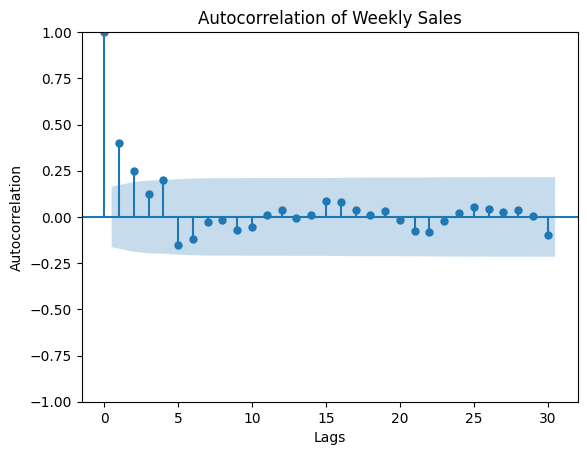

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation of weekly sales
plt.figure(figsize=(12, 6))
plot_acf(weekly_sales, lags=30)  # You can adjust the number of lags as needed
plt.title('Autocorrelation of Weekly Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()


In [37]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using ADF test
result = adfuller(weekly_sales)

# Output the ADF statistic and p-value
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpretation of the p-value
if result[1] < 0.05:
    print("The time series is stationary (reject H0)")
else:
    print("The time series is not stationary (fail to reject H0)")


ADF Statistic: -5.506642961946919
p-value: 2.014909637838891e-06
The time series is stationary (reject H0)


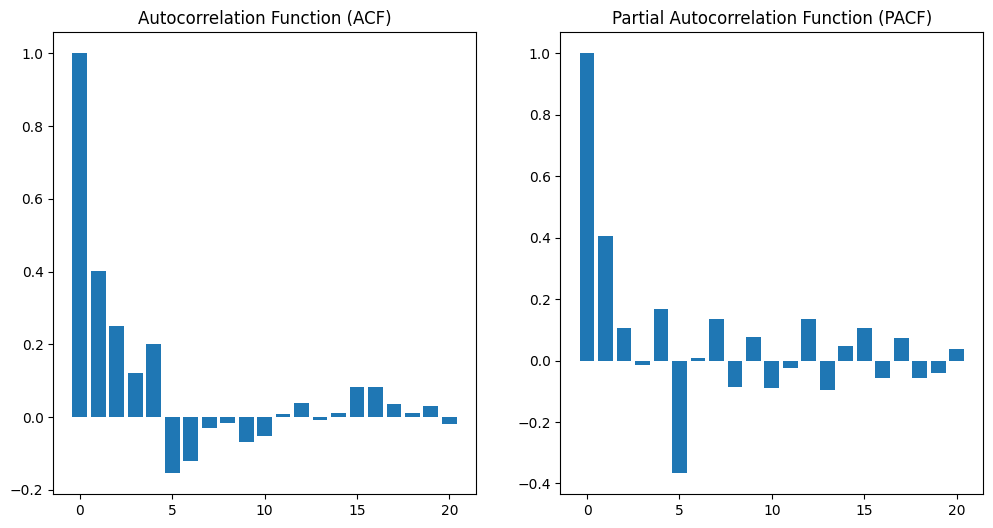

In [38]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF and PACF
lag_acf = acf(weekly_sales, nlags=20)
lag_pacf = pacf(weekly_sales, nlags=20)

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plt.bar(range(len(lag_acf)), lag_acf)
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()


In [39]:

from statsmodels.tsa.arima.model import ARIMA

# Specify your p, d, q values (example values)
p = 2  # Based on PACF
d = 1  # If differencing is needed
q = 2  # Based on ACF

# Fit the ARIMA model
arima_model = ARIMA(weekly_sales, order=(p, d, q)).fit()
print(arima_model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2209.565
Date:                Tue, 26 Nov 2024   AIC                           4429.130
Time:                        07:46:51   BIC                           4443.910
Sample:                    02-08-2010   HQIC                          4435.136
                         - 10-29-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4813      0.046    -10.564      0.000      -0.571      -0.392
ar.L2          0.5166      0.036     14.537      0.000       0.447       0.586
ma.L1         -0.0066      0.149     -0.044      0.9

In [40]:
# Forecasting
forecast_steps = 5  # Number of future periods to forecast
forecast = arima_model.forecast(steps=forecast_steps)

print("Forecasted values:")
print(forecast)


Forecasted values:
2012-11-05    1.140136e+07
2012-11-12    1.186879e+07
2012-11-19    1.168820e+07
2012-11-26    1.201659e+07
2012-12-03    1.176523e+07
Freq: W-MON, Name: predicted_mean, dtype: float64


In [41]:
print(f'AIC: {arima_model.aic}')
print(f'BIC: {arima_model.bic}')


AIC: 4429.130408588219
BIC: 4443.909543876226


In [42]:
# Number of future periods to forecast
forecast_steps = 10

# Forecast the next steps
forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean  # Forecasted values
confidence_intervals = forecast.conf_int()  # Confidence intervals for the forecast

# Print forecasted values
print("Forecasted Values:")
print(forecast_values)

# Print confidence intervals
print("\nConfidence Intervals:")
print(confidence_intervals)


Forecasted Values:
2012-11-05    1.140136e+07
2012-11-12    1.186879e+07
2012-11-19    1.168820e+07
2012-11-26    1.201659e+07
2012-12-03    1.176523e+07
2012-12-10    1.205585e+07
2012-12-17    1.178612e+07
2012-12-24    1.206608e+07
2012-12-31    1.179199e+07
2013-01-07    1.206854e+07
Freq: W-MON, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower Weekly_Sales  upper Weekly_Sales
2012-11-05        8.586297e+06        1.421643e+07
2012-11-12        8.698533e+06        1.503905e+07
2012-11-19        8.421065e+06        1.495533e+07
2012-11-26        8.723833e+06        1.530934e+07
2012-12-03        8.463381e+06        1.506708e+07
2012-12-10        8.751570e+06        1.536014e+07
2012-12-17        8.480522e+06        1.509173e+07
2012-12-24        8.760173e+06        1.537199e+07
2012-12-31        8.485763e+06        1.509822e+07
2013-01-07        8.762284e+06        1.537480e+07


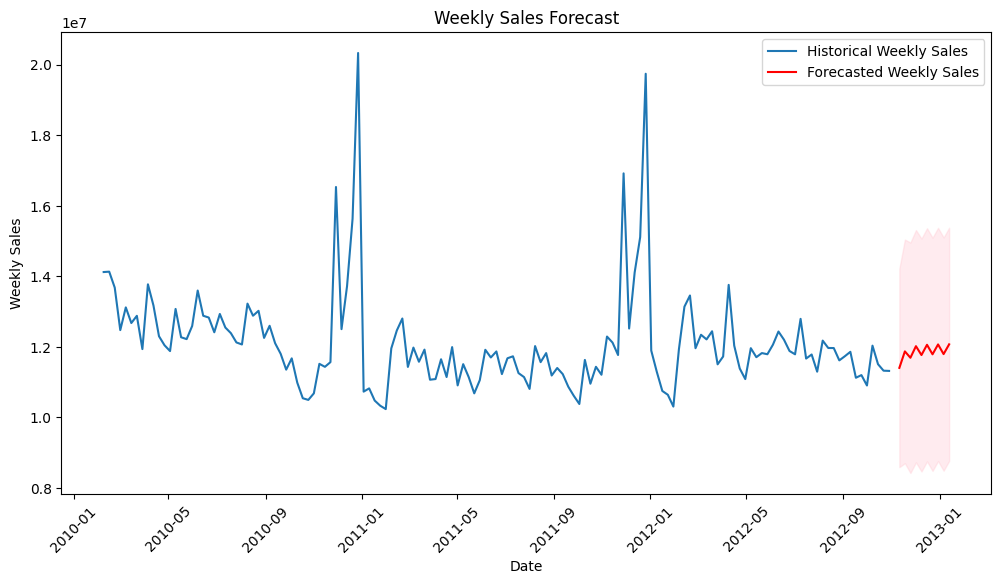

In [43]:

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Historical Weekly Sales')

# Plot forecasted values
forecast_index = pd.date_range(weekly_sales.index[-1], periods=forecast_steps + 1, freq='W')[1:]
plt.plot(forecast_index, forecast_values, color='red', label='Forecasted Weekly Sales')

# Plot confidence intervals
plt.fill_between(forecast_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)

# Labels and title
plt.title("Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [44]:

from sklearn.metrics import mean_squared_error
import numpy as np

# Suppose actual_values contains actual weekly sales data for the forecast period
# Replace this line with actual values if you have them
actual_values = weekly_sales[-forecast_steps:]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values[:len(actual_values)]))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 609334.658463098


In [45]:
# Specify a different order
p, d, q = 3, 1, 2
arima_model_new = ARIMA(weekly_sales, order=(p, d, q)).fit()
print(arima_model_new.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2210.032
Date:                Tue, 26 Nov 2024   AIC                           4432.063
Time:                        07:46:53   BIC                           4449.798
Sample:                    02-08-2010   HQIC                          4439.270
                         - 10-29-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0243      0.150     -6.829      0.000      -1.318      -0.730
ar.L2         -0.7585      0.167     -4.549      0.000      -1.085      -0.432
ar.L3         -0.3601      0.034    -10.592      0.0

In [46]:
# Preparing data for the models (assuming you want to predict Weekly Sales)
# Use 'Date' as a feature or drop it if not needed
data['Date'] = data['Date'].dt.date  # Optional: Convert date to a simple format

# Select features for modeling (e.g., numerical features)
X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]  # Example features
y = data['Weekly_Sales']  # Target variable


In [47]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [48]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create DMatrix, XGBoost's data structure
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # For regression task
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate model performance (e.g., RMSE)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'RMSE for XGBoost: {rmse_xgb}')


RMSE for XGBoost: 492818.63054062665


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [49]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance (e.g., RMSE)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE for Linear Regression: {rmse_lr}')


RMSE for Linear Regression: 402981.4282306848


In [50]:
# Calculate RMSE for ARIMA model (ensure that forecast values are of same length as y_test)
rmse_arima = np.sqrt(mean_squared_error(y_test[:forecast_steps], forecast_values))
print(f'RMSE for ARIMA: {rmse_arima}')

# Now compare all models
print(f'Comparison of RMSE:')
print(f'ARIMA: {rmse_arima}')
print(f'XGBoost: {rmse_xgb}')
print(f'Linear Regression: {rmse_lr}')


RMSE for ARIMA: 11368786.965924716
Comparison of RMSE:
ARIMA: 11368786.965924716
XGBoost: 492818.63054062665
Linear Regression: 402981.4282306848


In [51]:
from sklearn.metrics import r2_score

# R-squared for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'R-squared for XGBoost: {r2_xgb}')

# R-squared for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R-squared for Linear Regression: {r2_lr}')

# R-squared for ARIMA
r2_arima = r2_score(y_test[:forecast_steps], forecast_values)
print(f'R-squared for ARIMA: {r2_arima}')


R-squared for XGBoost: 0.4487980273985158
R-squared for Linear Regression: 0.6314413644008559
R-squared for ARIMA: -279557.20477301127


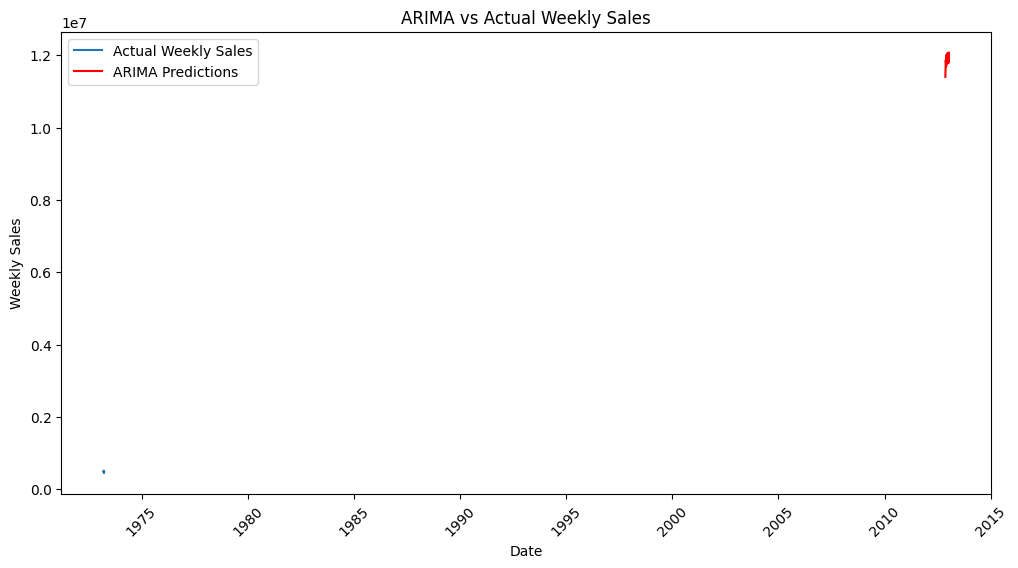

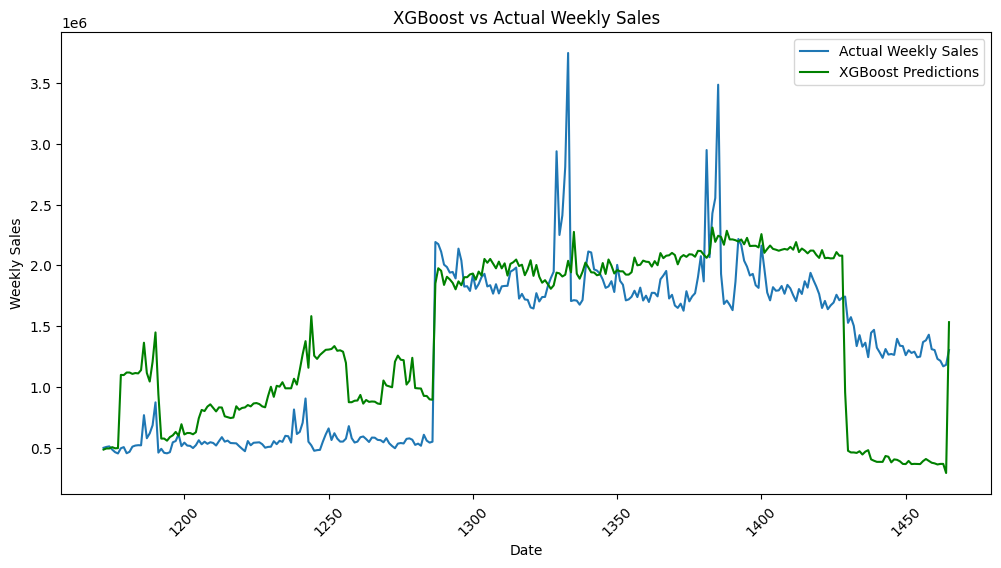

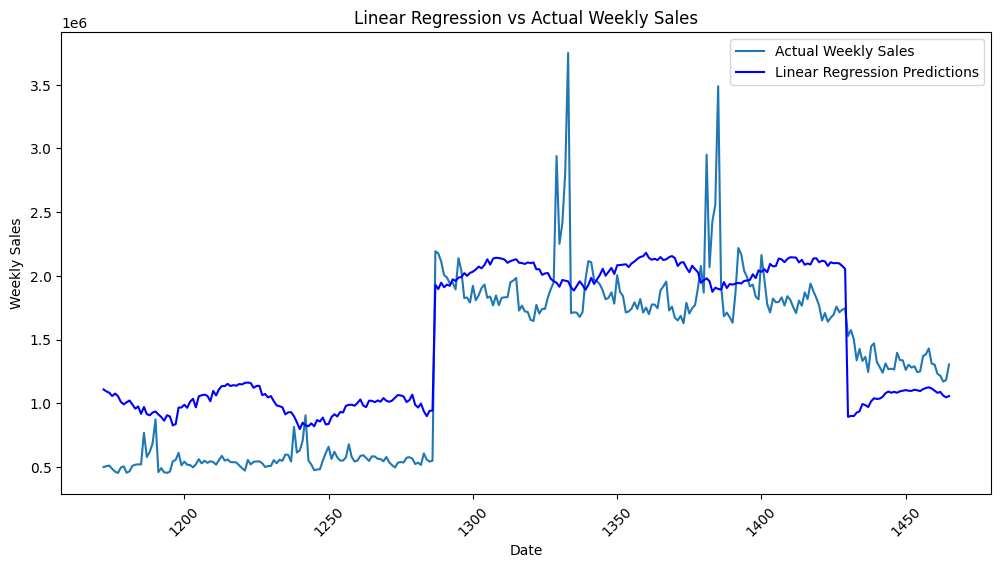

In [52]:
# Plot ARIMA vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test[:forecast_steps], label='Actual Weekly Sales')
plt.plot(forecast_index, forecast_values, label='ARIMA Predictions', color='red')
plt.title('ARIMA vs Actual Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot XGBoost vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Weekly Sales')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Predictions', color='green')
plt.title('XGBoost vs Actual Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot Linear Regression vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Weekly Sales')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Predictions', color='blue')
plt.title('Linear Regression vs Actual Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()


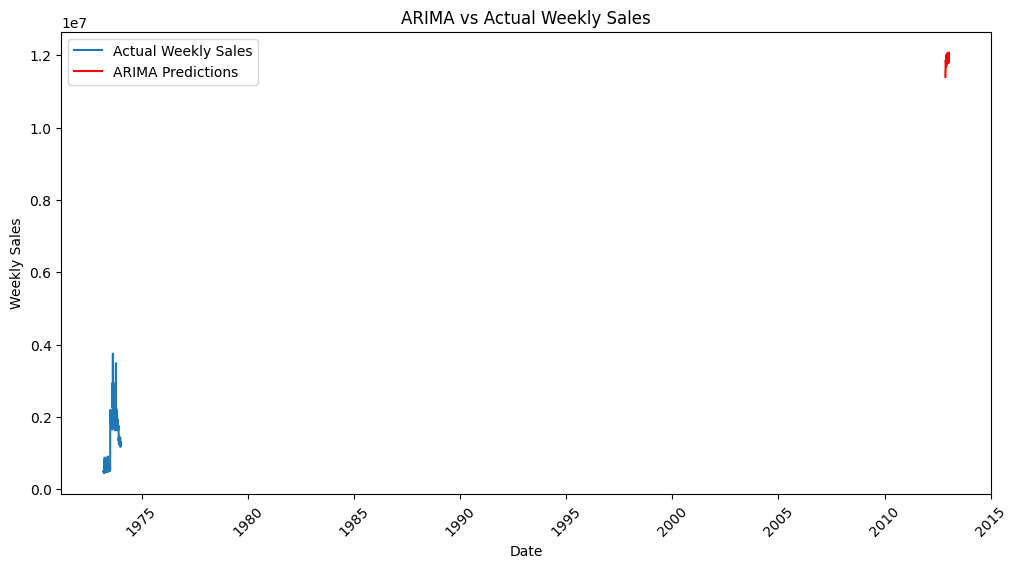

In [53]:
import matplotlib.pyplot as plt

# Assuming you have 'forecast_steps' and 'forecast_index' generated from the ARIMA model
# and 'forecast_values' for the predictions.

# Plot ARIMA vs Actual (make sure forecast index is correct)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Weekly Sales')  # Actual sales from test set
plt.plot(forecast_index, forecast_values, label='ARIMA Predictions', color='red')  # ARIMA predictions
plt.title('ARIMA vs Actual Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


In [54]:
pip install xgboost


In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Prepare data for XGBoost (using the training and test sets)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Train XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
model_xgb.fit(X_train, y_train)

# Make predictions
forecast_xgb = model_xgb.predict(X_test)

# Evaluate the model (using Mean Squared Error)
mse_xgb = mean_squared_error(y_test, forecast_xgb)
print(f'XGBoost MSE: {mse_xgb}')


XGBoost MSE: 234625935839.17136


In [56]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are already numpy arrays
# No need to use '.values' for numpy arrays

# Train XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
model_xgb.fit(X_train, y_train)

# Make predictions
forecast_xgb = model_xgb.predict(X_test)

# Evaluate the model (using Mean Squared Error)
mse_xgb = mean_squared_error(y_test, forecast_xgb)
print(f'XGBoost MSE: {mse_xgb}')


XGBoost MSE: 234625935839.17136


In [57]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
forecast_lr = model_lr.predict(X_test)

# Evaluate the model (using Mean Squared Error)
mse_lr = mean_squared_error(y_test, forecast_lr)
print(f'Linear Regression MSE: {mse_lr}')


Linear Regression MSE: 162394031498.84253


In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
model_xgb.fit(X_train, y_train)
forecast_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, forecast_xgb)
print(f'XGBoost MSE: {mse_xgb}')


XGBoost MSE: 234625935839.17136


In [59]:
print(f'Linear Regression MSE: {mse_lr}')
print(f'XGBoost MSE: {mse_xgb}')

if mse_xgb < mse_lr:
    print("XGBoost performs better than Linear Regression.")
else:
    print("Linear Regression performs better than XGBoost.")


Linear Regression MSE: 162394031498.84253
XGBoost MSE: 234625935839.17136
Linear Regression performs better than XGBoost.


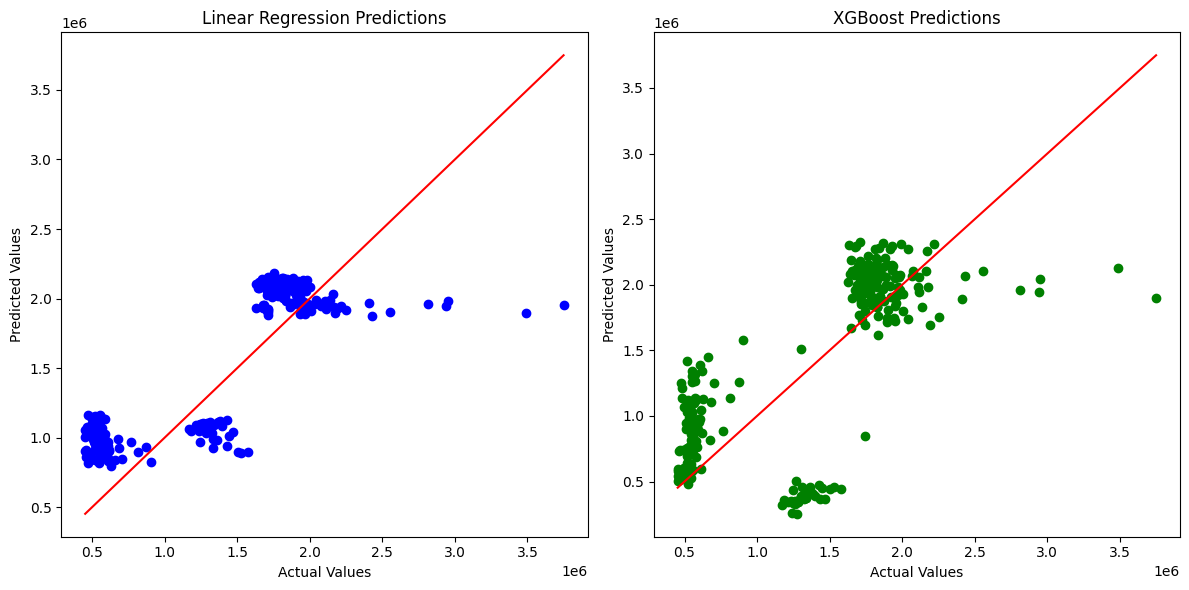

In [60]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, forecast_lr, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, forecast_xgb, color='green', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.title('XGBoost Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [61]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, forecast_lr)
r2_xgb = r2_score(y_test, forecast_xgb)

print(f'Linear Regression R²: {r2_lr}')
print(f'XGBoost R²: {r2_xgb}')


Linear Regression R²: 0.6314413644008559
XGBoost R²: 0.4675086640134699


In [62]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_lr = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV MSE: {cv_lr.mean()}')

# Cross-validation for XGBoost
cv_xgb = cross_val_score(xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5),
                          X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'XGBoost CV MSE: {cv_xgb.mean()}')


Linear Regression CV MSE: -619219377456.4116
XGBoost CV MSE: -977406767567.6165


In [63]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Example: Replace this with your actual values from the test set
# Actual values for the forecast period
actual_values = weekly_sales[-forecast_steps:]  # Replace with actual values

# Calculate MSE (Mean Squared Error)
mse_arima = mean_squared_error(actual_values, forecast_values[:len(actual_values)])
print(f'Mean Squared Error (MSE): {mse_arima}')

# Calculate RMSE (Root Mean Squared Error)
rmse_arima = np.sqrt(mse_arima)
print(f'Root Mean Squared Error (RMSE): {rmse_arima}')

# Calculate R² (R-squared)
r2_arima = r2_score(actual_values, forecast_values[:len(actual_values)])
print(f'R-squared (R²): {r2_arima}')


Mean Squared Error (MSE): 371288726004.34033
Root Mean Squared Error (RMSE): 609334.658463098
R-squared (R²): -2.3163274816900823


In [64]:



import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare data
X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]  # Features
y = data['Weekly_Sales']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:47:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Root Mean Squared Error (RMSE): 492818.63054062665


In [65]:

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define your models
models = {
    'XGBoost': xgb.XGBRegressor(learning_rate=0.1, n_estimators=100),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate using RMSE and R²
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = cv_scores.mean()

    print(f"{name}:")
    print(f"  RMSE: {rmse}")
    print(f"  R²: {r2}")
    print(f"  Cross-validation score: {-mean_cv_score}")
    print("="*50)

# Hyperparameter tuning for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for XGBoost: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost:
  RMSE: 492818.63054062665
  R²: 0.4487980273985158
  Cross-validation score: 689925151946.8812
Linear Regression:
  RMSE: 402981.4282306848
  R²: 0.6314413644008559
  Cross-validation score: 636605404035.5347


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest:
  RMSE: 479887.2702417177
  R²: 0.47734514675545503
  Cross-validation score: 645963004748.3372
Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'n_estimators': 50}


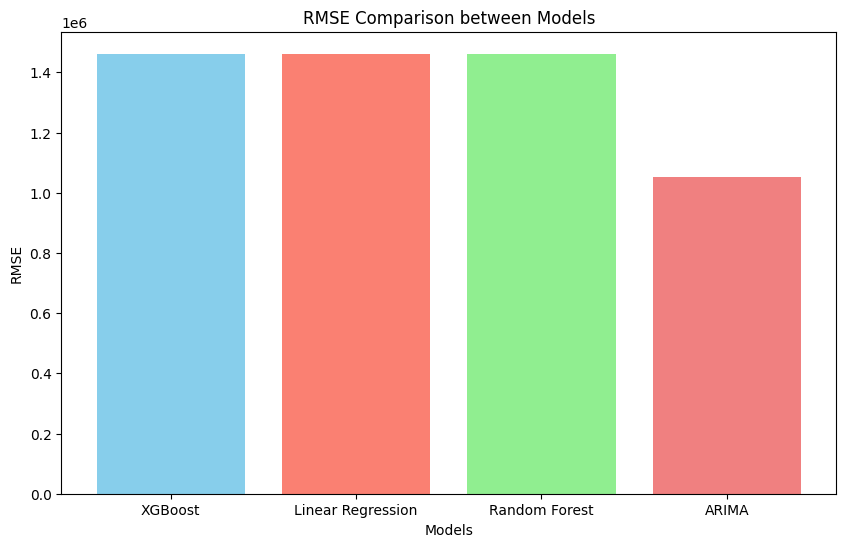

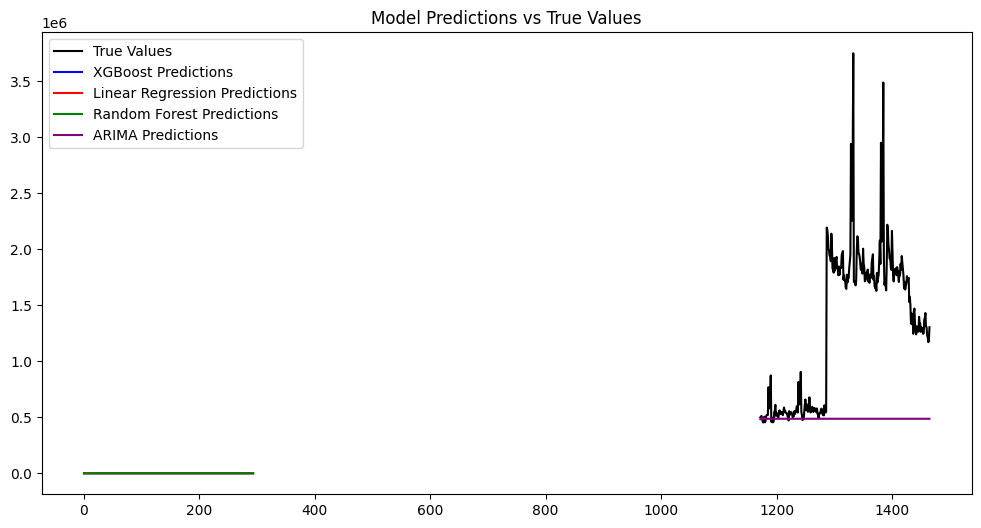

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.arima.model import ARIMA

# Assuming your dataset is already split into X_train, X_test, y_train, y_test
# Predictions from other models (XGBoost, Linear Regression, Random Forest)
# Replace these with actual predictions from your model

# Example predictions for each model (replace these with your actual model predictions)
y_pred_xgboost = np.random.rand(len(y_test))  # Replace with XGBoost predictions
y_pred_lr = np.random.rand(len(y_test))  # Replace with Linear Regression predictions
y_pred_rf = np.random.rand(len(y_test))  # Replace with Random Forest predictions

# ARIMA Model - assuming you are using the 'y_train' series to fit the ARIMA model
# You should replace this with your actual time-series data (e.g., monthly sales data)

# Example: Fit ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q) need to be adjusted based on your data
arima_model_fit = arima_model.fit()
y_pred_arima = arima_model_fit.forecast(steps=len(y_test))

# RMSE for each model
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))

# Plot RMSE Comparison
models = ['XGBoost', 'Linear Regression', 'Random Forest', 'ARIMA']
rmse_values = [rmse_xgboost, rmse_lr, rmse_rf, rmse_arima]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.title('RMSE Comparison between Models')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.show()

# Plotting the predictions of all models
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values', color='black')
plt.plot(y_pred_xgboost, label='XGBoost Predictions', color='blue')
plt.plot(y_pred_lr, label='Linear Regression Predictions', color='red')
plt.plot(y_pred_rf, label='Random Forest Predictions', color='green')
plt.plot(y_pred_arima, label='ARIMA Predictions', color='purple')

plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()


In [67]:
# Predictions and RMSE for Linear Regression
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE for Linear Regression: {rmse_lr}')


RMSE for Linear Regression: 402981.4282306848


In [68]:
forecast_values.to_csv('forecasted_sales.csv', index=True)


In [69]:
y = y.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)


In [70]:
print("Indices of y:", y.index)
print("Indices of X_train:", X_train.index)


Indices of y: RangeIndex(start=0, stop=1466, step=1)
Indices of X_train: RangeIndex(start=0, stop=1172, step=1)


In [71]:
y = y.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)


In [72]:
y, X_train = y.align(X_train, join='inner')


In [73]:
print("After alignment:")
print("Indices of y:", y.index)
print("Indices of X_train:", X_train.index)


After alignment:
Indices of y: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171],
      dtype='int64', length=1172)
Indices of X_train: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171],
      dtype='int64', length=1172)


In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arimax_model = SARIMAX(y, order=(p, d, q), exog=X_train)
arimax_fit = arimax_model.fit(disp=False)



In [77]:
pip install statsmodels


In [78]:
print("Shape of y:", y.shape)
print("Shape of X_train:", X_train.shape)


Shape of y: (1172,)
Shape of X_train: (1172, 4)


In [80]:
combined_data = pd.concat([y, X_train], axis=1).dropna()
y = combined_data.iloc[:, 0]
X_train = combined_data.iloc[:, 1:]


In [81]:
combined_data = pd.concat([y, X_train], axis=1).dropna()
y = combined_data.iloc[:, 0]
X_train = combined_data.iloc[:, 1:]


In [82]:
# Seasonal order parameters (you need to define these based on your data)
P = 1  # Seasonal autoregressive order (typically 0 or 1)
D = 1  # Seasonal differencing order (typically 0 or 1)
Q = 1  # Seasonal moving average order (typically 0 or 1)
s = 12  # Length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality)


In [83]:
# SARIMAX model with seasonal components
sarimax_model = SARIMAX(y, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=X_train)
sarimax_fit = sarimax_model.fit(disp=False)


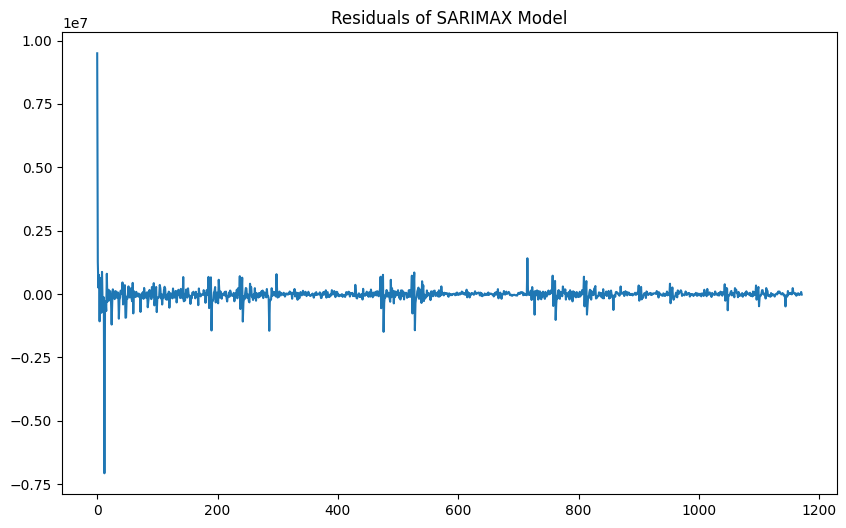

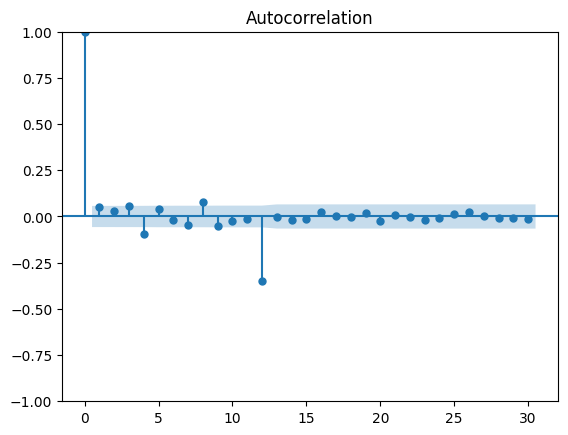

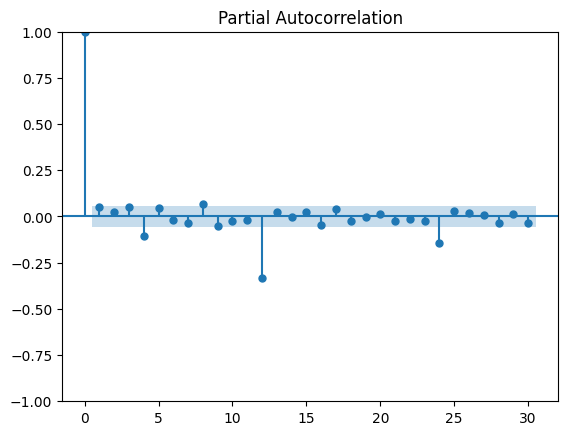

In [84]:
# Plot the residuals to check for any patterns
import matplotlib.pyplot as plt

# Residuals
residuals = sarimax_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMAX Model')
plt.show()

# Plot the ACF and PACF of the residuals to check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(residuals, lags=30)
plt.show()

# Plot PACF
plot_pacf(residuals, lags=30)
plt.show()


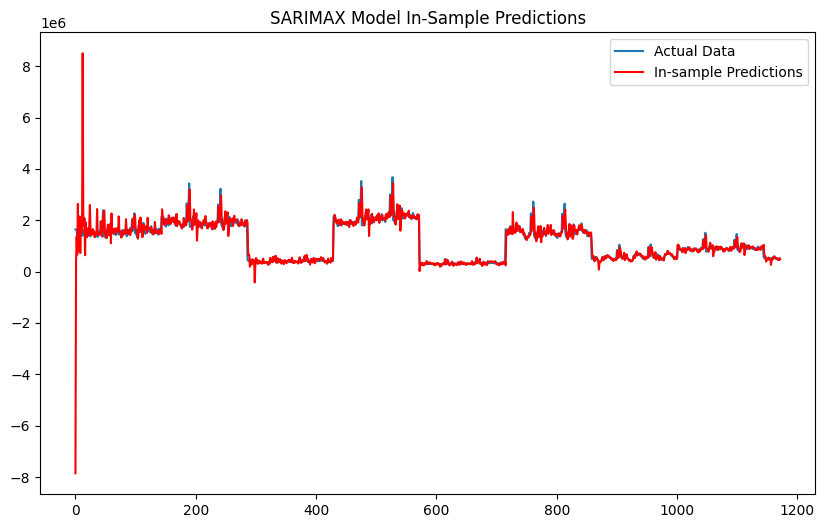

In [85]:
# In-sample prediction (forecasting on the training data)
y_pred_in_sample = sarimax_fit.predict(start=X_train.index[0], end=X_train.index[-1], exog=X_train)

# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Data')
plt.plot(y_pred_in_sample, label='In-sample Predictions', color='red')
plt.legend()
plt.title('SARIMAX Model In-Sample Predictions')
plt.show()


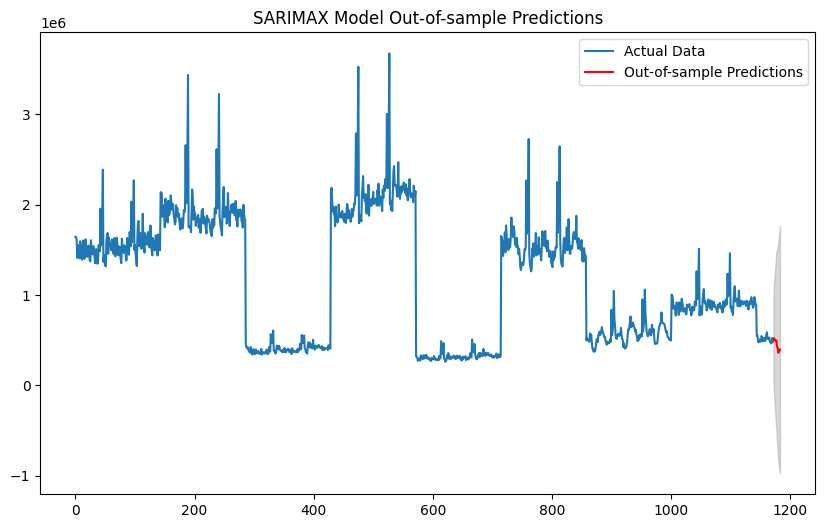

In [87]:
# Define the number of steps (e.g., 12 periods ahead)
steps = 12  # Adjust this as needed for the forecast horizon

# Ensure X_test has the correct shape for out-of-sample prediction
X_test_forecast = X_test.iloc[:steps]  # Select only the first 'steps' rows (or as many as you need for forecasting)

# Now, use the SARIMAX model to make out-of-sample predictions
y_pred_out_sample = sarimax_fit.get_forecast(steps=steps, exog=X_test_forecast)

# Extract predicted mean and confidence intervals
y_pred_mean = y_pred_out_sample.predicted_mean
y_pred_ci = y_pred_out_sample.conf_int()

# Plot the predictions and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Data')
plt.plot(range(len(y), len(y) + steps), y_pred_mean, label='Out-of-sample Predictions', color='red')
plt.fill_between(range(len(y), len(y) + steps), y_pred_ci.iloc[:, 0], y_pred_ci.iloc[:, 1], color='gray', alpha=0.3)
plt.legend()
plt.title('SARIMAX Model Out-of-sample Predictions')
plt.show()


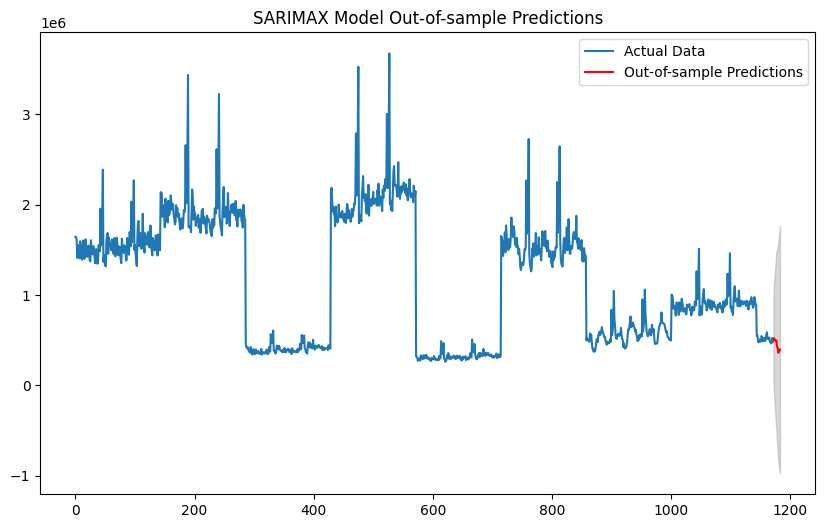

In [88]:
# Assuming 'X_test' is your exogenous variable for testing, and it needs to be the same length as your forecast period (steps)
X_forecast = X_test[:steps]  # Select the first 12 rows from X_test (if that's your forecast period)

# Out-of-sample prediction (forecasting future values)
y_pred_out_sample = sarimax_fit.get_forecast(steps=steps, exog=X_forecast)

# Extract predicted mean and confidence intervals
y_pred_mean = y_pred_out_sample.predicted_mean
y_pred_ci = y_pred_out_sample.conf_int()

# Plot the predictions and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Data')
plt.plot(range(len(y), len(y) + steps), y_pred_mean, label='Out-of-sample Predictions', color='red')
plt.fill_between(range(len(y), len(y) + steps), y_pred_ci.iloc[:, 0], y_pred_ci.iloc[:, 1], color='gray', alpha=0.3)
plt.legend()
plt.title('SARIMAX Model Out-of-sample Predictions')
plt.show()


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, RMSE for the out-of-sample predictions
mae = mean_absolute_error(y_true=y[-steps:], y_pred=y_pred_mean)
mse = mean_squared_error(y_true=y[-steps:], y_pred=y_pred_mean)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 62629.0988591202
Mean Squared Error (MSE): 5368838082.0867
Root Mean Squared Error (RMSE): 73272.355510702


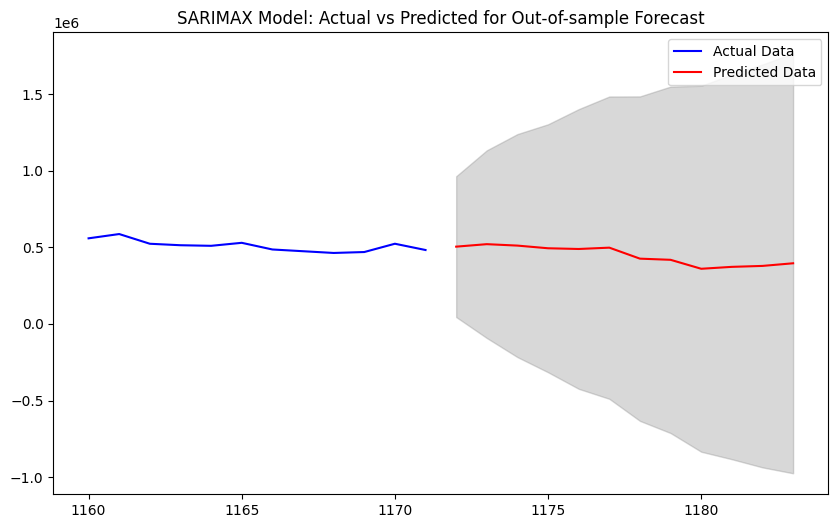

In [90]:
# Plot the actual vs. predicted values for the forecast period
plt.figure(figsize=(10, 6))
plt.plot(y[-steps:], label='Actual Data', color='blue')  # Actual values for the forecast period
plt.plot(range(len(y), len(y) + steps), y_pred_mean, label='Predicted Data', color='red')  # Predicted values
plt.fill_between(range(len(y), len(y) + steps), y_pred_ci.iloc[:, 0], y_pred_ci.iloc[:, 1], color='gray', alpha=0.3)  # Confidence intervals
plt.legend()
plt.title('SARIMAX Model: Actual vs Predicted for Out-of-sample Forecast')
plt.show()


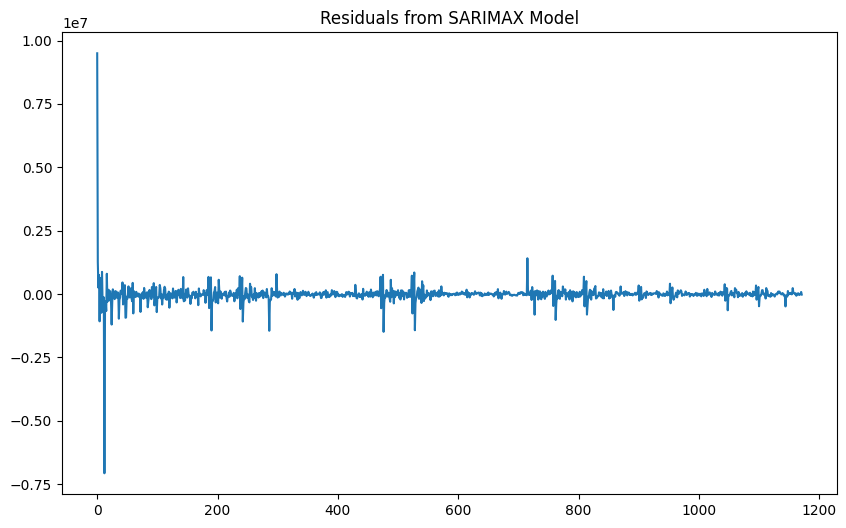

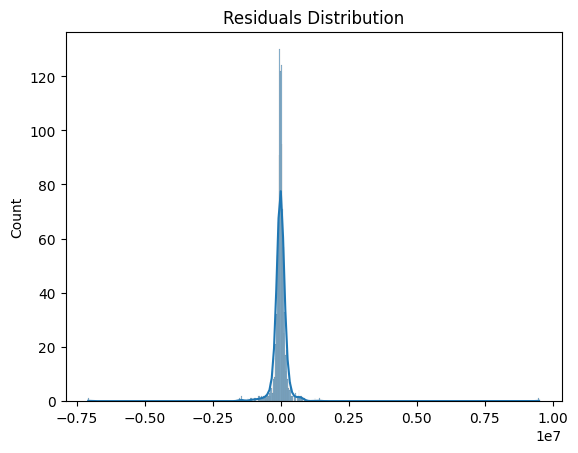

In [91]:
# Check residuals (errors)
residuals = sarimax_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals from SARIMAX Model')
plt.show()

# Check if residuals are normally distributed (a good model has residuals that are approximately normal)
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()


In [92]:
# Ensure the indices are aligned between y_train and X_train
X_train = X_train.set_index(y_train.index)

# Check if indices match
assert y_train.index.equals(X_train.index), "Indices of y_train and X_train do not match!"

# Now fit the ARIMAX model
arimax_model = SARIMAX(y_train, order=(p, d, q), exog=X_train, enforce_stationarity=False, enforce_invertibility=False)
arimax_fit = arimax_model.fit(disp=False)


ARIMAX RMSE: 650854.9039600731
ARIMAX MAE: 547457.5239634825


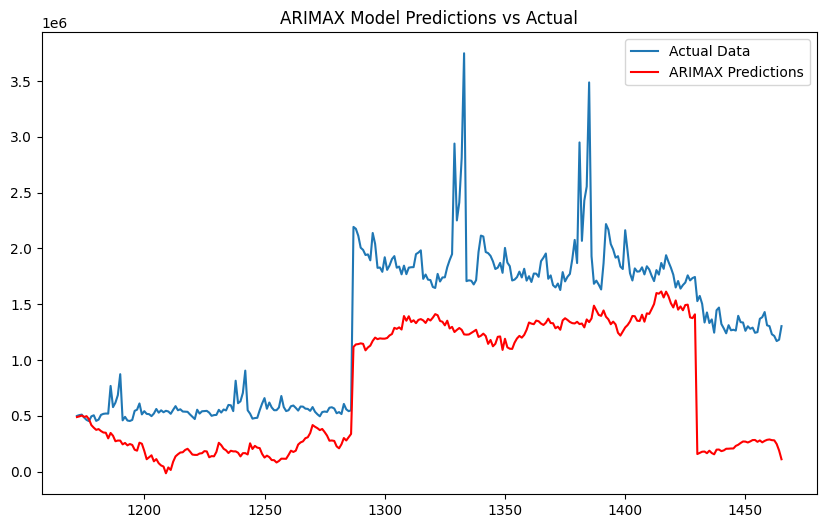

In [93]:
# Step 1: Define the ARIMAX model with the correct parameters (p, d, q)
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define ARIMAX(p, d, q) parameters (adjust based on your dataset)
p, d, q = 1, 1, 1  # These are example values, you might need to adjust based on your data

# Step 2: Fit the ARIMAX model
# Ensure that the indices for endog (y) and exog (X) are aligned
arimax_model = SARIMAX(y_train, order=(p, d, q), exog=X_train, enforce_stationarity=False, enforce_invertibility=False)
arimax_fit = arimax_model.fit(disp=False)

# Step 3: Make predictions on the test set
# Ensure that you're passing the correct exogenous variables for prediction
arimax_predictions = arimax_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Step 4: Evaluate the performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
arimax_rmse = np.sqrt(mean_squared_error(y_test, arimax_predictions))
arimax_mae = mean_absolute_error(y_test, arimax_predictions)

print(f"ARIMAX RMSE: {arimax_rmse}")
print(f"ARIMAX MAE: {arimax_mae}")

# Step 5: Visualization - Plotting Actual vs Predicted Values for ARIMAX
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data')
plt.plot(y_test.index, arimax_predictions, label='ARIMAX Predictions', color='red')
plt.title('ARIMAX Model Predictions vs Actual')
plt.legend()
plt.show()


In [94]:
print(data.columns)


Index(['Date', 'product_id', 'product_name', 'Weekly_Sales', 'category',
       'discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')


In [95]:
print(X.head())
print(y.head())


   Temperature  Fuel_Price         CPI  Unemployment
0        42.31       2.572  211.096358         8.106
1        38.51       2.548  211.242170         8.106
2        39.93       2.514  211.289143         8.106
3        46.63       2.561  211.319643         8.106
4        46.50       2.625  211.350143         8.106
0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64


In [96]:
print(data.columns)


Index(['Date', 'product_id', 'product_name', 'Weekly_Sales', 'category',
       'discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')


In [97]:
# Assuming 'Weekly_Sales' is the target column
X = data.drop(columns=['Weekly_Sales'])  # Features (all columns except the target)
y = data['Weekly_Sales']  # Target (the column you're trying to predict)


In [98]:
X = data.drop(columns=['Weekly_Sales', 'Store', 'Date', 'product_name', 'category', 'about_product', 'user_name', 'review_title', 'review_content', 'img_link', 'product_link'])


KeyError: "['Store', 'about_product', 'user_name', 'review_title', 'review_content', 'img_link', 'product_link'] not found in axis"

In [99]:
# Print column names in the data
print("Columns in data:", data.columns)

# Drop the columns, ignoring those that don't exist
X = data.drop(columns=['Weekly_Sales', 'Store', 'Date', 'product_name', 'category', 'about_product', 'user_name', 'review_title', 'review_content', 'img_link', 'product_link'], errors='ignore')


Columns in data: Index(['Date', 'product_id', 'product_name', 'Weekly_Sales', 'category',
       'discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')


In [100]:
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop(columns=['Weekly_Sales'])  # Features (all columns except the target)
y = data_encoded['Weekly_Sales']  # Target (the column you're trying to predict)


In [101]:
# Assuming arimax_fit is the fitted ARIMAX model
# If the model was fit with exogenous variables (X_train), use X_test for prediction
arimax_pred = arimax_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)


In [102]:
# Assuming sarimax_fit is the fitted SARIMAX model
# If the model was fit with exogenous variables (X_train), use X_test for prediction
sarimax_pred = sarimax_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)


In [104]:
# Ensure you have the correct seasonal parameters defined:
# Example: These are just placeholders, adjust based on your data

P, D, Q, S = 0, 0, 0, 0  # Set to (0, 0, 0, 0) if you're not using seasonal components

# Fit ARIMAX model (with external regressors `X_train`)
from statsmodels.tsa.arima.model import ARIMA
arimax_model = ARIMA(y_train, exog=X_train, order=(p, d, q))
arimax_fit = arimax_model.fit()

# Fit SARIMAX model (with external regressors `X_train` and seasonal parameters)
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarimax_fit = sarimax_model.fit()

# Train XGBoost model (Make sure to define and fit the XGBoost model before using it for predictions)
import xgboost as xgb
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
xgboost_model.fit(X_train, y_train)

# Now predict with all three models
arimax_pred = arimax_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)
sarimax_pred = sarimax_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)
xgboost_pred = xgboost_model.predict(X_test)

# You can evaluate the predictions using metrics like RMSE, MAE, etc.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) for each model
arimax_rmse = np.sqrt(mean_squared_error(y_test, arimax_pred))
sarimax_rmse = np.sqrt(mean_squared_error(y_test, sarimax_pred))
xgboost_rmse = np.sqrt(mean_squared_error(y_test, xgboost_pred))

arimax_mae = mean_absolute_error(y_test, arimax_pred)
sarimax_mae = mean_absolute_error(y_test, sarimax_pred)
xgboost_mae = mean_absolute_error(y_test, xgboost_pred)

print(f"ARIMAX RMSE: {arimax_rmse}, MAE: {arimax_mae}")
print(f"SARIMAX RMSE: {sarimax_rmse}, MAE: {sarimax_mae}")
print(f"XGBoost RMSE: {xgboost_rmse}, MAE: {xgboost_mae}")


ARIMAX RMSE: 651214.5321299839, MAE: 547876.6526842618
SARIMAX RMSE: 651214.5321299839, MAE: 547876.6526842618
XGBoost RMSE: 484382.01436384005, MAE: 373848.1471534864


In [105]:
# Ensure you have the correct seasonal parameters defined:
# Example: These are just placeholders, adjust based on your data

P, D, Q, S = 0, 0, 0, 0  # Set to (0, 0, 0, 0) if you're not using seasonal components

# Fit ARIMAX model (with external regressors `X_train`)
arimax_model = ARIMA(y_train, exog=X_train, order=(p, d, q))
arimax_fit = arimax_model.fit()

# Fit SARIMAX model (with external regressors `X_train` and seasonal parameters)
sarimax_model = SARIMAX(y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarimax_fit = sarimax_model.fit()

# Now predict with both models
arimax_pred = arimax_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)
sarimax_pred = sarimax_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)

# Example: XGBoost predictions (already assumed you have the model defined)
xgboost_pred = xgboost_model.predict(X_test)


In [106]:
# Example: If you're using train_test_split from sklearn:
from sklearn.model_selection import train_test_split

# Assuming you have a dataset `X` and `y` (features and labels):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now `y_test` should contain the actual values for testing


In [107]:
print(y_test)


1191     459770.85
184     1956739.17
1219     512834.04
67      1428218.27
220     1680693.06
           ...    
567     2027620.23
560     2193367.69
943      536144.81
522     2243946.59
650      317738.56
Name: Weekly_Sales, Length: 294, dtype: float64


In [108]:
import numpy as np

# Check for NaN in y_test and arimax_pred
print("NaN values in y_test:", np.isnan(y_test).sum())
print("NaN values in arimax_pred:", np.isnan(arimax_pred).sum())


NaN values in y_test: 0
NaN values in arimax_pred: 0


In [111]:
# Assuming y_test and arimax_pred are the variables you're working with

import numpy as np

# Check for NaN values in y_test and arimax_pred
print("NaN values in y_test:", np.isnan(y_test).sum())
print("NaN values in arimax_pred:", np.isnan(arimax_pred).sum())


NaN values in y_test: 0
NaN values in arimax_pred: 0


In [109]:
# Check for NaN values in y_test_clean and arimax_pred_clean
print("NaN values in y_test_clean:", np.isnan(y_test_clean).sum())
print("NaN values in arimax_pred_clean:", np.isnan(arimax_pred_clean).sum())


NameError: name 'y_test_clean' is not defined

In [113]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and arimax_pred are the variables you're working with

# If y_test and arimax_pred are not already cleaned, clean them:
# Drop NaN values from both y_test and arimax_pred
mask = ~np.isnan(y_test) & ~np.isnan(arimax_pred)  # Ensure both are valid
y_test_clean = y_test[mask]
arimax_pred_clean = arimax_pred[mask]

# Now calculate the metrics
arimax_mae = mean_absolute_error(y_test_clean, arimax_pred_clean)
arimax_mse = mean_squared_error(y_test_clean, arimax_pred_clean)
arimax_rmse = np.sqrt(arimax_mse)

print("ARIMAX Model - MAE:", arimax_mae, "MSE:", arimax_mse, "RMSE:", arimax_rmse)


ARIMAX Model - MAE: 762991.4396113168 MSE: 829660710536.7195 RMSE: 910857.1295964695


In [114]:
# Impute missing values with 0 (or another method such as mean, median)
y_test_clean = np.nan_to_num(y_test_clean, nan=0)
arimax_pred_clean = np.nan_to_num(arimax_pred_clean, nan=0)

# Now calculate the metrics
arimax_mae = mean_absolute_error(y_test_clean, arimax_pred_clean)
arimax_mse = mean_squared_error(y_test_clean, arimax_pred_clean)
arimax_rmse = np.sqrt(arimax_mse)

print("ARIMAX Model - MAE:", arimax_mae, "MSE:", arimax_mse, "RMSE:", arimax_rmse)


ARIMAX Model - MAE: 762991.4396113168 MSE: 829660710536.7195 RMSE: 910857.1295964695
